# Importamos librerías

In [1]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

# Importamos los datos

In [4]:
path = '../../../Base de datos/Trayectorias 200 eval'

## Datos de entrenamiento

### Datos

In [5]:
varftrain = np.load(path + '/varftrain.npy')

In [6]:
np.shape(varftrain)

(7000, 10, 2, 200)

### Coeficientes

In [7]:
coefvarftrain = np.load(path + '/coefvarftrain.npy')

In [8]:
np.shape(coefvarftrain)

(7000, 7)

## Datos de prueba

### Datos

In [9]:
varftest = np.load(path + '/varftest.npy')

In [10]:
np.shape(varftest)

(2000, 10, 2, 200)

### Coeficientes

In [11]:
coefvarftest = np.load(path + '/coefvarftest.npy')

In [12]:
np.shape(coefvarftest)

(2000, 7)

## Datos de validación

### Datos

In [13]:
varfval = np.load(path + '/varfval.npy')

In [14]:
np.shape(varfval)

(1000, 10, 2, 200)

### Coeficienes

In [15]:
coefvarfval = np.load(path + '/coefvarfval.npy')

In [16]:
np.shape(coefvarfval)

(1000, 7)

# Unimos coeficientes con los datos

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((varftrain, coefvarftrain))
test_dataset = tf.data.Dataset.from_tensor_slices((varftest, coefvarftest))
val_dataset = tf.data.Dataset.from_tensor_slices((varfval, coefvarfval))

In [18]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(10, 2, 200), dtype=tf.float64, name=None), TensorSpec(shape=(7,), dtype=tf.int32, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [19]:
BATCH_SIZE = 100
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [20]:
#model = Sequential()

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(10,2,200)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(7)])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 batch_normalization (BatchN  (None, 4000)             16000     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               512128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                        

# Entrenamos el modelo

In [22]:
model.compile(optimizer='adam',
              loss='MSE',
              metrics=['accuracy'])

In [24]:
def scheduler(epoch, lr):
  if epoch < 400:
    return lr
  else:
    return -1.65e-6*epoch +  0.00166

In [25]:
val_epochs = 1000
tf.compat.v1.global_variables_initializer()

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 1000,verbose = 1, 
                                              restore_best_weights = True)

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop])

Epoch 1/1000
70/70 [==============================] - 1s 8ms/step - loss: 27.8631 - accuracy: 0.2874 - val_loss: 32.0430 - val_accuracy: 0.3420 - lr: 0.0010
Epoch 2/1000
70/70 [==============================] - 0s 6ms/step - loss: 20.2390 - accuracy: 0.3339 - val_loss: 16.1522 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 3/1000
70/70 [==============================] - 0s 6ms/step - loss: 10.9023 - accuracy: 0.3409 - val_loss: 8.9776 - val_accuracy: 0.3780 - lr: 0.0010
Epoch 4/1000
70/70 [==============================] - 0s 6ms/step - loss: 6.7978 - accuracy: 0.3521 - val_loss: 6.9694 - val_accuracy: 0.3870 - lr: 0.0010
Epoch 5/1000
70/70 [==============================] - 0s 6ms/step - loss: 6.0432 - accuracy: 0.3740 - val_loss: 5.5394 - val_accuracy: 0.4280 - lr: 0.0010
Epoch 6/1000
70/70 [==============================] - 0s 6ms/step - loss: 5.8338 - accuracy: 0.3889 - val_loss: 5.3260 - val_accuracy: 0.4240 - lr: 0.0010
Epoch 7/1000
70/70 [==============================] - 0s 7ms/step

70/70 [==============================] - 0s 6ms/step - loss: 4.2854 - accuracy: 0.4953 - val_loss: 4.2178 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 54/1000
70/70 [==============================] - 0s 6ms/step - loss: 4.2297 - accuracy: 0.4964 - val_loss: 4.3059 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 55/1000
70/70 [==============================] - 0s 6ms/step - loss: 4.2274 - accuracy: 0.4943 - val_loss: 4.3320 - val_accuracy: 0.4970 - lr: 0.0010
Epoch 56/1000
70/70 [==============================] - 0s 7ms/step - loss: 4.2533 - accuracy: 0.4971 - val_loss: 4.3791 - val_accuracy: 0.4820 - lr: 0.0010
Epoch 57/1000
70/70 [==============================] - 0s 6ms/step - loss: 4.2522 - accuracy: 0.4954 - val_loss: 4.3462 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 58/1000
70/70 [==============================] - 0s 6ms/step - loss: 4.2547 - accuracy: 0.4941 - val_loss: 4.4880 - val_accuracy: 0.4780 - lr: 0.0010
Epoch 59/1000
70/70 [==============================] - 0s 6ms/step - loss: 4.1

70/70 [==============================] - 0s 6ms/step - loss: 3.7307 - accuracy: 0.5297 - val_loss: 4.6573 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 106/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.6780 - accuracy: 0.5296 - val_loss: 4.6483 - val_accuracy: 0.4670 - lr: 0.0010
Epoch 107/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.6972 - accuracy: 0.5333 - val_loss: 4.6808 - val_accuracy: 0.4610 - lr: 0.0010
Epoch 108/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.6804 - accuracy: 0.5367 - val_loss: 4.6992 - val_accuracy: 0.4740 - lr: 0.0010
Epoch 109/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.6743 - accuracy: 0.5326 - val_loss: 4.6689 - val_accuracy: 0.4670 - lr: 0.0010
Epoch 110/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.6606 - accuracy: 0.5324 - val_loss: 4.6219 - val_accuracy: 0.4770 - lr: 0.0010
Epoch 111/1000
70/70 [==============================] - 0s 6ms/step - los

70/70 [==============================] - 0s 6ms/step - loss: 3.2356 - accuracy: 0.5556 - val_loss: 4.8584 - val_accuracy: 0.4700 - lr: 0.0010
Epoch 158/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.2718 - accuracy: 0.5594 - val_loss: 5.0783 - val_accuracy: 0.4490 - lr: 0.0010
Epoch 159/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.3116 - accuracy: 0.5464 - val_loss: 4.9568 - val_accuracy: 0.4620 - lr: 0.0010
Epoch 160/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.2085 - accuracy: 0.5650 - val_loss: 5.0105 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 161/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.2155 - accuracy: 0.5696 - val_loss: 5.0422 - val_accuracy: 0.4630 - lr: 0.0010
Epoch 162/1000
70/70 [==============================] - 0s 6ms/step - loss: 3.2110 - accuracy: 0.5634 - val_loss: 5.0426 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 163/1000
70/70 [==============================] - 0s 6ms/step - los

70/70 [==============================] - 0s 6ms/step - loss: 2.9157 - accuracy: 0.5704 - val_loss: 5.3120 - val_accuracy: 0.4580 - lr: 0.0010
Epoch 210/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.9007 - accuracy: 0.5750 - val_loss: 5.2466 - val_accuracy: 0.4790 - lr: 0.0010
Epoch 211/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.8882 - accuracy: 0.5794 - val_loss: 5.3445 - val_accuracy: 0.4660 - lr: 0.0010
Epoch 212/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.8891 - accuracy: 0.5800 - val_loss: 5.4137 - val_accuracy: 0.4710 - lr: 0.0010
Epoch 213/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.9007 - accuracy: 0.5787 - val_loss: 5.3827 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 214/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.8453 - accuracy: 0.5859 - val_loss: 5.2517 - val_accuracy: 0.4710 - lr: 0.0010
Epoch 215/1000
70/70 [==============================] - 0s 6ms/step - los

70/70 [==============================] - 0s 6ms/step - loss: 2.6770 - accuracy: 0.5954 - val_loss: 5.5480 - val_accuracy: 0.4600 - lr: 0.0010
Epoch 262/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.6690 - accuracy: 0.5904 - val_loss: 5.5326 - val_accuracy: 0.4640 - lr: 0.0010
Epoch 263/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.7079 - accuracy: 0.5959 - val_loss: 5.4844 - val_accuracy: 0.4620 - lr: 0.0010
Epoch 264/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.6464 - accuracy: 0.5931 - val_loss: 5.5809 - val_accuracy: 0.4650 - lr: 0.0010
Epoch 265/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.6142 - accuracy: 0.5973 - val_loss: 5.5136 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 266/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.5979 - accuracy: 0.6027 - val_loss: 5.5593 - val_accuracy: 0.4660 - lr: 0.0010
Epoch 267/1000
70/70 [==============================] - 0s 6ms/step - los

70/70 [==============================] - 0s 6ms/step - loss: 2.5373 - accuracy: 0.5971 - val_loss: 5.6762 - val_accuracy: 0.4610 - lr: 0.0010
Epoch 314/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4859 - accuracy: 0.6070 - val_loss: 5.6645 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 315/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.4894 - accuracy: 0.5993 - val_loss: 5.5890 - val_accuracy: 0.4580 - lr: 0.0010
Epoch 316/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.4925 - accuracy: 0.6079 - val_loss: 5.6698 - val_accuracy: 0.4620 - lr: 0.0010
Epoch 317/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.5516 - accuracy: 0.5953 - val_loss: 5.6048 - val_accuracy: 0.4620 - lr: 0.0010
Epoch 318/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.4707 - accuracy: 0.6057 - val_loss: 5.6487 - val_accuracy: 0.4580 - lr: 0.0010
Epoch 319/1000
70/70 [==============================] - 0s 6ms/step - los

70/70 [==============================] - 0s 6ms/step - loss: 2.3731 - accuracy: 0.6126 - val_loss: 5.7267 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 366/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4360 - accuracy: 0.6143 - val_loss: 5.6562 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 367/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4214 - accuracy: 0.6121 - val_loss: 5.5788 - val_accuracy: 0.4580 - lr: 0.0010
Epoch 368/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.4072 - accuracy: 0.6154 - val_loss: 5.6629 - val_accuracy: 0.4670 - lr: 0.0010
Epoch 369/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.4259 - accuracy: 0.6133 - val_loss: 5.6697 - val_accuracy: 0.4630 - lr: 0.0010
Epoch 370/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.4153 - accuracy: 0.6137 - val_loss: 5.6204 - val_accuracy: 0.4470 - lr: 0.0010
Epoch 371/1000
70/70 [==============================] - 0s 6ms/step - los

Epoch 417/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2598 - accuracy: 0.6170 - val_loss: 5.8501 - val_accuracy: 0.4740 - lr: 9.7360e-04
Epoch 418/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.3137 - accuracy: 0.6190 - val_loss: 5.8677 - val_accuracy: 0.4610 - lr: 9.7195e-04
Epoch 419/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.2386 - accuracy: 0.6261 - val_loss: 5.8332 - val_accuracy: 0.4650 - lr: 9.7030e-04
Epoch 420/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2865 - accuracy: 0.6283 - val_loss: 5.7991 - val_accuracy: 0.4540 - lr: 9.6865e-04
Epoch 421/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.2697 - accuracy: 0.6160 - val_loss: 5.8551 - val_accuracy: 0.4670 - lr: 9.6700e-04
Epoch 422/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2974 - accuracy: 0.6234 - val_loss: 5.8837 - val_accuracy: 0.4680 - lr: 9.6535e-04
Epoch 423/1000
70/70 [============

Epoch 468/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.1802 - accuracy: 0.6244 - val_loss: 5.8043 - val_accuracy: 0.4640 - lr: 8.8945e-04
Epoch 469/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.1937 - accuracy: 0.6260 - val_loss: 5.8416 - val_accuracy: 0.4620 - lr: 8.8780e-04
Epoch 470/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2302 - accuracy: 0.6266 - val_loss: 5.9032 - val_accuracy: 0.4740 - lr: 8.8615e-04
Epoch 471/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.1997 - accuracy: 0.6209 - val_loss: 5.7810 - val_accuracy: 0.4610 - lr: 8.8450e-04
Epoch 472/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2129 - accuracy: 0.6246 - val_loss: 5.8754 - val_accuracy: 0.4690 - lr: 8.8285e-04
Epoch 473/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.2017 - accuracy: 0.6230 - val_loss: 5.8357 - val_accuracy: 0.4600 - lr: 8.8120e-04
Epoch 474/1000
70/70 [============

Epoch 519/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.1354 - accuracy: 0.6264 - val_loss: 5.8872 - val_accuracy: 0.4650 - lr: 8.0530e-04
Epoch 520/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.1429 - accuracy: 0.6339 - val_loss: 5.8059 - val_accuracy: 0.4630 - lr: 8.0365e-04
Epoch 521/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.1164 - accuracy: 0.6340 - val_loss: 5.8734 - val_accuracy: 0.4470 - lr: 8.0200e-04
Epoch 522/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.1399 - accuracy: 0.6290 - val_loss: 5.8205 - val_accuracy: 0.4550 - lr: 8.0035e-04
Epoch 523/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.0952 - accuracy: 0.6326 - val_loss: 5.8296 - val_accuracy: 0.4400 - lr: 7.9870e-04
Epoch 524/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.1238 - accuracy: 0.6284 - val_loss: 5.8616 - val_accuracy: 0.4590 - lr: 7.9705e-04
Epoch 525/1000
70/70 [============

Epoch 570/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.0761 - accuracy: 0.6336 - val_loss: 5.8432 - val_accuracy: 0.4450 - lr: 7.2115e-04
Epoch 571/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0607 - accuracy: 0.6329 - val_loss: 5.8224 - val_accuracy: 0.4640 - lr: 7.1950e-04
Epoch 572/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0307 - accuracy: 0.6363 - val_loss: 5.8744 - val_accuracy: 0.4470 - lr: 7.1785e-04
Epoch 573/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.0719 - accuracy: 0.6386 - val_loss: 5.7731 - val_accuracy: 0.4560 - lr: 7.1620e-04
Epoch 574/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0554 - accuracy: 0.6350 - val_loss: 5.9036 - val_accuracy: 0.4360 - lr: 7.1455e-04
Epoch 575/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.0800 - accuracy: 0.6360 - val_loss: 5.7631 - val_accuracy: 0.4570 - lr: 7.1290e-04
Epoch 576/1000
70/70 [============

Epoch 621/1000
70/70 [==============================] - 0s 7ms/step - loss: 2.0179 - accuracy: 0.6433 - val_loss: 5.7591 - val_accuracy: 0.4670 - lr: 6.3700e-04
Epoch 622/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9904 - accuracy: 0.6384 - val_loss: 5.8358 - val_accuracy: 0.4720 - lr: 6.3535e-04
Epoch 623/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0501 - accuracy: 0.6333 - val_loss: 5.9186 - val_accuracy: 0.4680 - lr: 6.3370e-04
Epoch 624/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9770 - accuracy: 0.6377 - val_loss: 5.8480 - val_accuracy: 0.4670 - lr: 6.3205e-04
Epoch 625/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0100 - accuracy: 0.6383 - val_loss: 5.8104 - val_accuracy: 0.4640 - lr: 6.3040e-04
Epoch 626/1000
70/70 [==============================] - 0s 6ms/step - loss: 2.0154 - accuracy: 0.6303 - val_loss: 5.8861 - val_accuracy: 0.4590 - lr: 6.2875e-04
Epoch 627/1000
70/70 [============

Epoch 672/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.9667 - accuracy: 0.6380 - val_loss: 5.8852 - val_accuracy: 0.4630 - lr: 5.5285e-04
Epoch 673/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9983 - accuracy: 0.6416 - val_loss: 5.8635 - val_accuracy: 0.4640 - lr: 5.5120e-04
Epoch 674/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9340 - accuracy: 0.6416 - val_loss: 5.8369 - val_accuracy: 0.4720 - lr: 5.4955e-04
Epoch 675/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9781 - accuracy: 0.6361 - val_loss: 5.8063 - val_accuracy: 0.4620 - lr: 5.4790e-04
Epoch 676/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9252 - accuracy: 0.6453 - val_loss: 5.8519 - val_accuracy: 0.4620 - lr: 5.4625e-04
Epoch 677/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9544 - accuracy: 0.6491 - val_loss: 5.8070 - val_accuracy: 0.4560 - lr: 5.4460e-04
Epoch 678/1000
70/70 [============

Epoch 723/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9563 - accuracy: 0.6397 - val_loss: 5.9175 - val_accuracy: 0.4550 - lr: 4.6870e-04
Epoch 724/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8979 - accuracy: 0.6436 - val_loss: 5.8732 - val_accuracy: 0.4610 - lr: 4.6705e-04
Epoch 725/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9157 - accuracy: 0.6479 - val_loss: 5.8638 - val_accuracy: 0.4710 - lr: 4.6540e-04
Epoch 726/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9169 - accuracy: 0.6420 - val_loss: 5.8156 - val_accuracy: 0.4700 - lr: 4.6375e-04
Epoch 727/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8930 - accuracy: 0.6406 - val_loss: 5.9304 - val_accuracy: 0.4640 - lr: 4.6210e-04
Epoch 728/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.9174 - accuracy: 0.6427 - val_loss: 5.8608 - val_accuracy: 0.4620 - lr: 4.6045e-04
Epoch 729/1000
70/70 [============

Epoch 774/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8591 - accuracy: 0.6517 - val_loss: 5.8649 - val_accuracy: 0.4610 - lr: 3.8455e-04
Epoch 775/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8986 - accuracy: 0.6443 - val_loss: 5.9375 - val_accuracy: 0.4500 - lr: 3.8290e-04
Epoch 776/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8757 - accuracy: 0.6474 - val_loss: 5.8644 - val_accuracy: 0.4660 - lr: 3.8125e-04
Epoch 777/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8975 - accuracy: 0.6476 - val_loss: 5.8224 - val_accuracy: 0.4790 - lr: 3.7960e-04
Epoch 778/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8721 - accuracy: 0.6499 - val_loss: 5.8399 - val_accuracy: 0.4630 - lr: 3.7795e-04
Epoch 779/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8630 - accuracy: 0.6526 - val_loss: 5.8573 - val_accuracy: 0.4590 - lr: 3.7630e-04
Epoch 780/1000
70/70 [============

Epoch 825/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8660 - accuracy: 0.6523 - val_loss: 5.8595 - val_accuracy: 0.4560 - lr: 3.0040e-04
Epoch 826/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8443 - accuracy: 0.6463 - val_loss: 5.8863 - val_accuracy: 0.4600 - lr: 2.9875e-04
Epoch 827/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8693 - accuracy: 0.6589 - val_loss: 5.9388 - val_accuracy: 0.4620 - lr: 2.9710e-04
Epoch 828/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8654 - accuracy: 0.6516 - val_loss: 5.9078 - val_accuracy: 0.4660 - lr: 2.9545e-04
Epoch 829/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8415 - accuracy: 0.6573 - val_loss: 5.8980 - val_accuracy: 0.4680 - lr: 2.9380e-04
Epoch 830/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8575 - accuracy: 0.6597 - val_loss: 5.8935 - val_accuracy: 0.4670 - lr: 2.9215e-04
Epoch 831/1000
70/70 [============

Epoch 876/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8296 - accuracy: 0.6531 - val_loss: 5.9142 - val_accuracy: 0.4580 - lr: 2.1625e-04
Epoch 877/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.8242 - accuracy: 0.6556 - val_loss: 5.9113 - val_accuracy: 0.4590 - lr: 2.1460e-04
Epoch 878/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8359 - accuracy: 0.6603 - val_loss: 5.9161 - val_accuracy: 0.4540 - lr: 2.1295e-04
Epoch 879/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8436 - accuracy: 0.6553 - val_loss: 5.9053 - val_accuracy: 0.4530 - lr: 2.1130e-04
Epoch 880/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8301 - accuracy: 0.6546 - val_loss: 5.9306 - val_accuracy: 0.4570 - lr: 2.0965e-04
Epoch 881/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7892 - accuracy: 0.6556 - val_loss: 5.9304 - val_accuracy: 0.4550 - lr: 2.0800e-04
Epoch 882/1000
70/70 [============

Epoch 927/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7979 - accuracy: 0.6571 - val_loss: 5.9107 - val_accuracy: 0.4500 - lr: 1.3210e-04
Epoch 928/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7914 - accuracy: 0.6639 - val_loss: 5.9593 - val_accuracy: 0.4510 - lr: 1.3045e-04
Epoch 929/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8005 - accuracy: 0.6603 - val_loss: 5.9275 - val_accuracy: 0.4510 - lr: 1.2880e-04
Epoch 930/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.8188 - accuracy: 0.6517 - val_loss: 5.8984 - val_accuracy: 0.4530 - lr: 1.2715e-04
Epoch 931/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7452 - accuracy: 0.6611 - val_loss: 5.9522 - val_accuracy: 0.4540 - lr: 1.2550e-04
Epoch 932/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.7892 - accuracy: 0.6554 - val_loss: 5.9777 - val_accuracy: 0.4500 - lr: 1.2385e-04
Epoch 933/1000
70/70 [============

Epoch 978/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7938 - accuracy: 0.6554 - val_loss: 5.9022 - val_accuracy: 0.4560 - lr: 4.7950e-05
Epoch 979/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7678 - accuracy: 0.6566 - val_loss: 5.9066 - val_accuracy: 0.4550 - lr: 4.6300e-05
Epoch 980/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7991 - accuracy: 0.6484 - val_loss: 5.9207 - val_accuracy: 0.4500 - lr: 4.4650e-05
Epoch 981/1000
70/70 [==============================] - 0s 7ms/step - loss: 1.7880 - accuracy: 0.6557 - val_loss: 5.9193 - val_accuracy: 0.4540 - lr: 4.3000e-05
Epoch 982/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7610 - accuracy: 0.6647 - val_loss: 5.9227 - val_accuracy: 0.4570 - lr: 4.1350e-05
Epoch 983/1000
70/70 [==============================] - 0s 6ms/step - loss: 1.7633 - accuracy: 0.6634 - val_loss: 5.9283 - val_accuracy: 0.4570 - lr: 3.9700e-05
Epoch 984/1000
70/70 [============

# Analizamos accuracy y loss

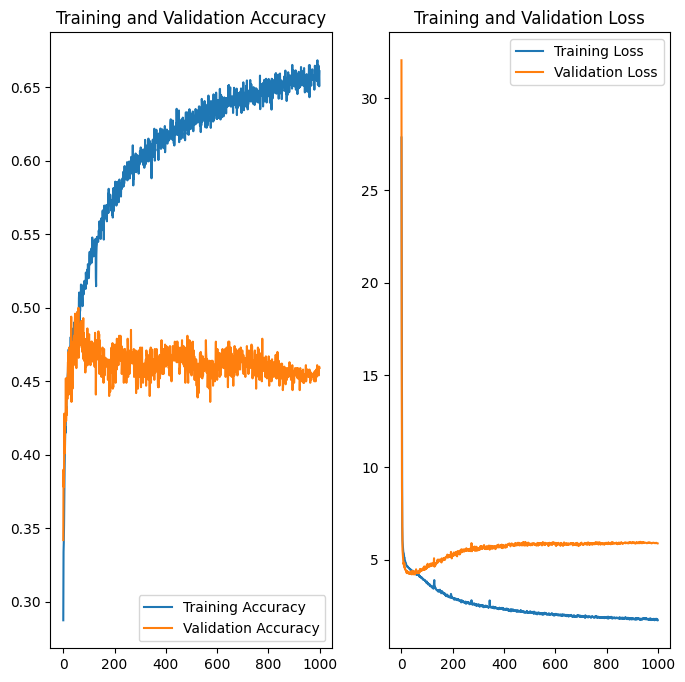

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(val_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Guardamos los datos de Accuracy y Loss

In [27]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../../Gráficas finales/historytrayec200.csv', index=False)

# Guardamos el modelo

In [28]:
path_to_save = '../../../Modelos/Modelos 100,200'

In [29]:
model.save(path_to_save + '/trayectorias200.h5')

# Importamos el modelo

In [30]:
new_model = keras.models.load_model('../../../Modelos/Modelos 100,200/trayectorias200.h5')

# Probamos el modelo con datos nuevos

## Creamos nuevos datos

In [89]:
import random
from scipy.integrate import solve_ivp
condini = []
varf = []
coef = []
contador = 0
for i in range(0, 1):
    # constantes
    a1 = random.randint(0, 10)
    a2 = random.randint(0, 10)
    b1 = random.randint(0, 10)
    b2 = random.randint(0, 10)
    d1 = random.randint(0, 10)
    d2 = random.randint(0, 10)
    n = random.randint(0, 5)

    coef1 = [a1, a2, b1, b2, d1, d2, n]
    coef.append(coef1)

    def f(t, y):

        # asignar a cada ODE a un elemento de vector
        X = y[0]
        Y = y[1]

        # definimos cada ODE
        # dX_dt=a1/(1+Y**n)-d1*X+b1
        # dY_dt=a2/(1+X**n)-d2*Y+b2
        dX_dt = a1/(1+Y**n)-d1*X+b1
        dY_dt = a2/(1+X**n)-d2*Y+b1

        return [dX_dt, dY_dt]

    # Declaramos el vector de tiempo
    t_span = [0, 5]
    times = np.linspace(t_span[0], t_span[1], 200)
    
    varfci2 = []
    for i_ci in range(0, 10):
        # Definimos las condiciones iniciales
        y0 = np.array([random.randint(0, 10), random.randint(0, 10)])
        condini.append(y0)
        # Resolvemos
        # Modificar manualmente el intervalo de tiempo
        sol = solve_ivp(f, t_span, y0, t_eval=times)
        # sol=solve_ivp(f, t_span, y0) #Dejar que la librería elija el mejor intervalo
        tiempo = sol.t
        var1 = sol.y[0]
        var2 = sol.y[1]

        varfci = np.append([var1], [var2], axis=0)
        varfci2.append(varfci)

       

    varf= varfci2
    print('--------------------------------------------')
    print(coef1)
    print(np.shape(varf))
varf = np.array(varf)
coef = np.array(coef)

--------------------------------------------
[8, 0, 1, 8, 3, 10, 2]
(10, 2, 200)


In [90]:
varfnone = varf[None, :]

## Predecimos con los datos nuevos

In [91]:
new_predictions = new_model.predict(varfnone)
new_predictions = np.round(new_predictions)
new_predictions = np.clip(new_predictions, 0, None)
print(new_predictions)

1/1 [==============================] - 0s 17ms/step
[[8. 5. 2. 7. 3. 9. 3.]]


## Graficamos con los coeficientes reales

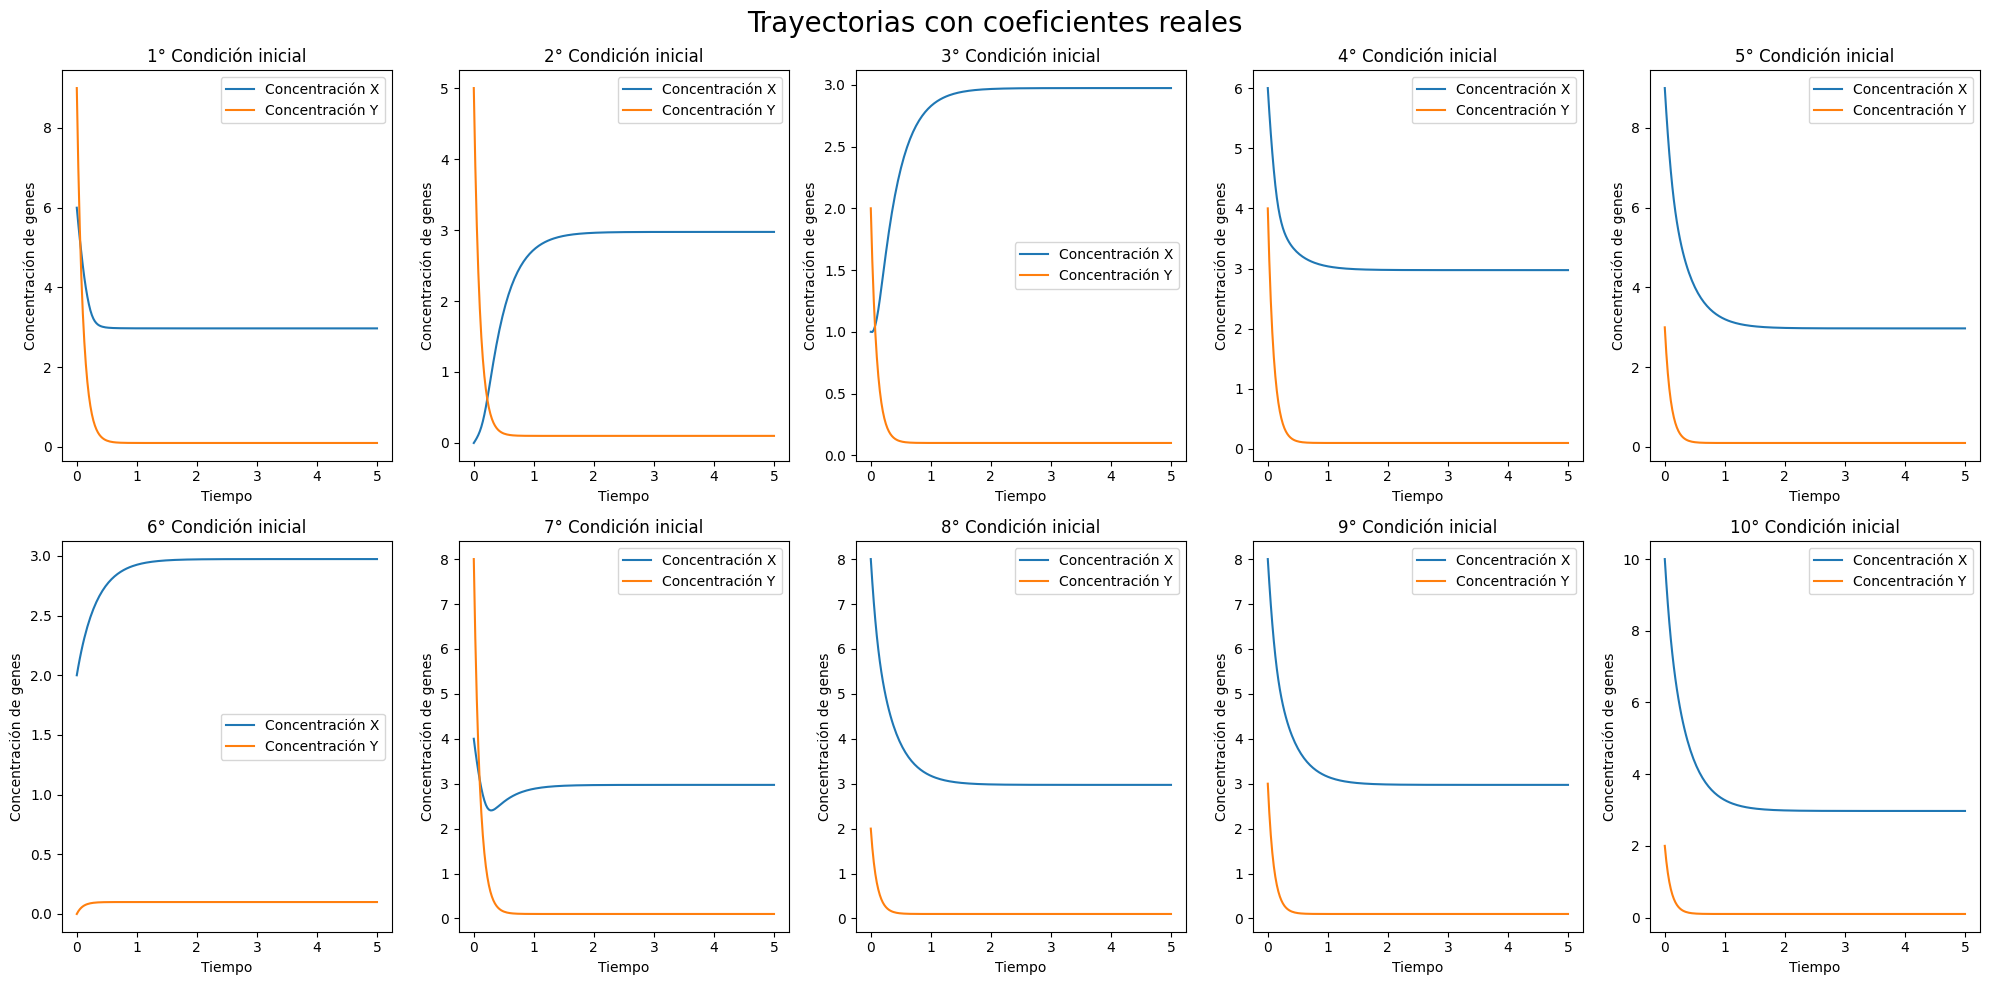

In [102]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 5 filas de gráficos, 2 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

for i in range(10):
    axes[i].plot(times, np.array(varf)[i, 0, :], label=f"Concentración X")
    axes[i].plot(times,np.array(varf)[i,1,:], label=f"Concentración Y")
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Trayectorias con coeficientes reales', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  # esto ayuda a que los gráficos no se superpongan
plt.show()

In [93]:
np.shape(new_predictions)

(1, 7)

## Graficamos con los coeficientes predecidos

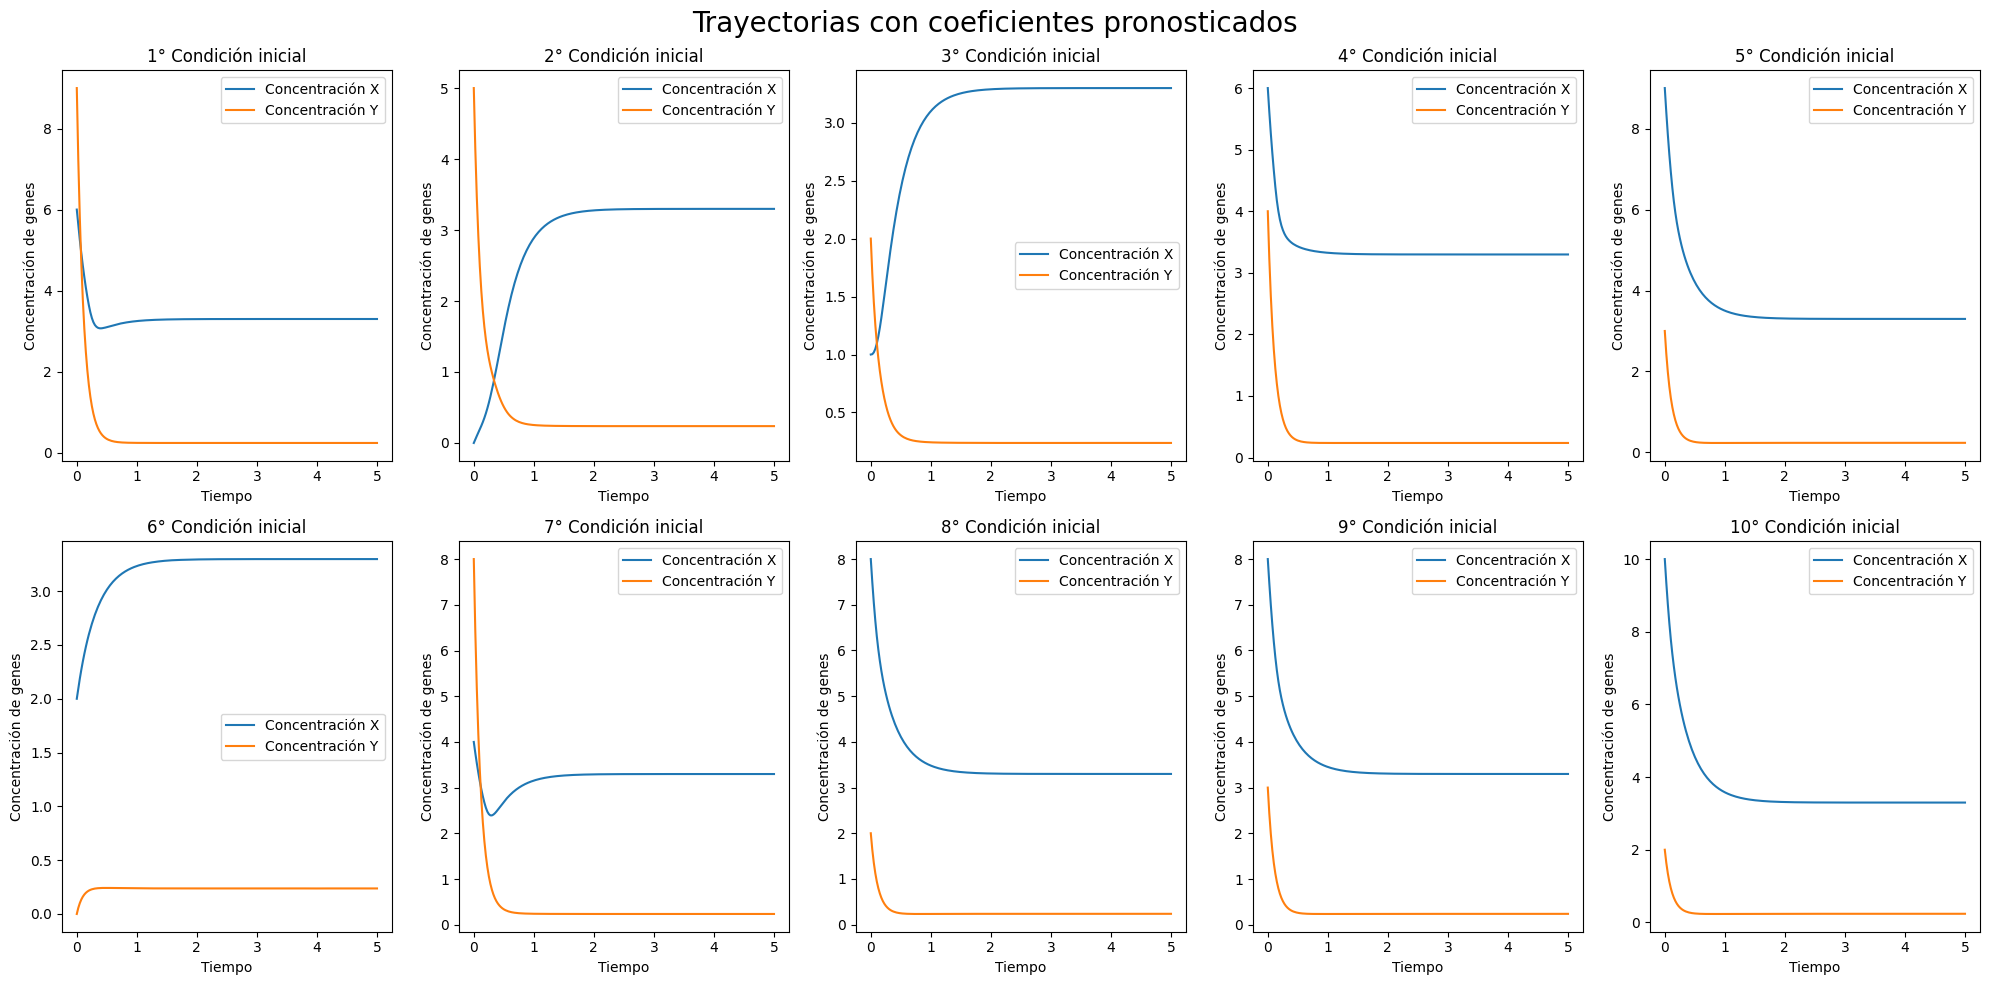

In [101]:
a1 = new_predictions[0,0]
a2 = new_predictions[0,1]
b1 = new_predictions[0,2]
b2 = new_predictions[0,3]
d1 = new_predictions[0,4]
d2 = new_predictions[0,5]
n = new_predictions[0,6]

varfpred = []

def f(t, y):

    # asignar a cada ODE a un elemento de vector
    X = y[0]
    Y = y[1]

    # definimos cada ODE
    dX_dt = a1/(1+Y**n)-d1*X+b1
    dY_dt = a2/(1+X**n)-d2*Y+b1

    return [dX_dt, dY_dt]

# Declaramos el vector de tiempo
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
varfci2pred = []

for i_ci in range(0, 10):
# Definimos las condiciones iniciales
    y0 = condini[i_ci]
    # Resolvemos
    sol = solve_ivp(f, t_span, y0, t_eval=times)
    tiempo = sol.t
    var1pred = sol.y[0]
    var2pred = sol.y[1]
    varfcipred = np.append([var1pred], [var2pred], axis=0)
    varfci2pred.append(varfcipred)
    
varfpred= varfci2pred

fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 5 filas de gráficos, 2 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos
# Graficamos
for i in range(10):
    axes[i].plot(times, np.array(varfpred)[i, 0, :], label=f"Concentración X")
    axes[i].plot(times,np.array(varfpred)[i,1,:], label=f"Concentración Y")
    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Trayectorias con coeficientes pronosticados', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  
plt.show()

# Graficamos ambos

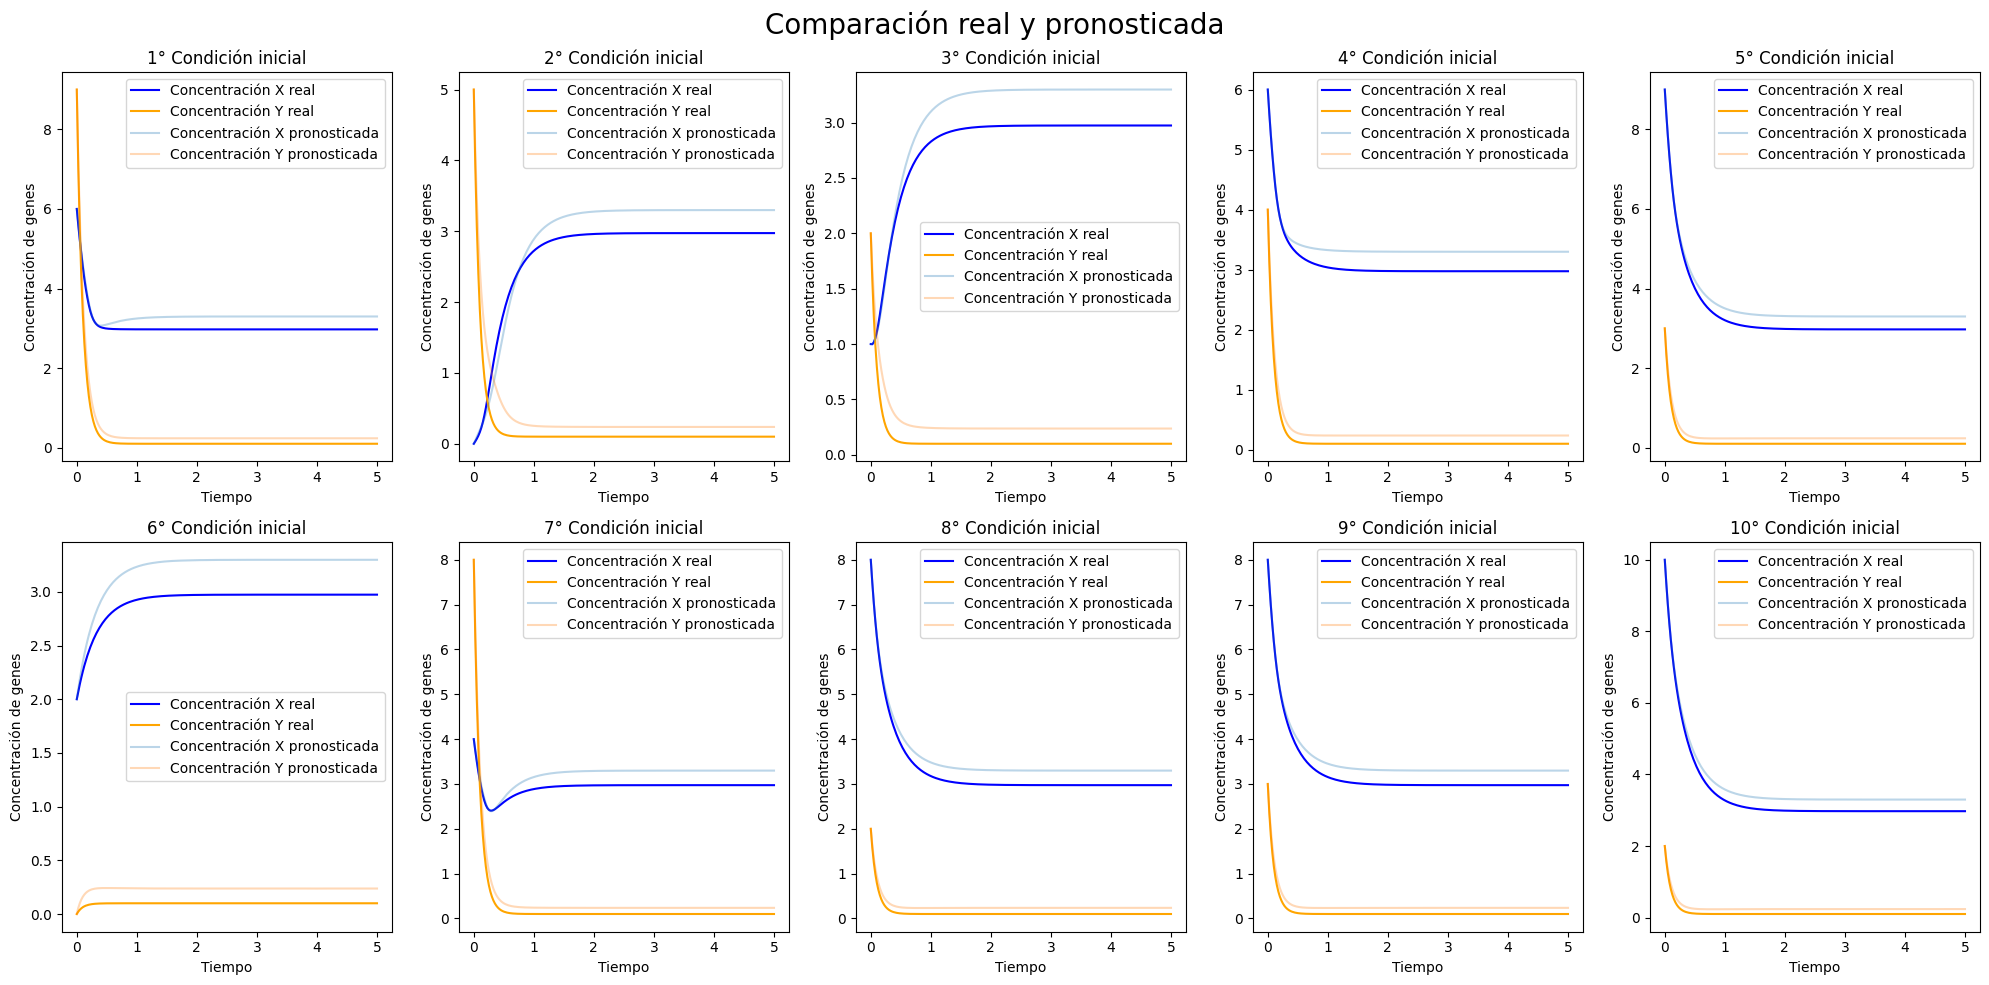

In [100]:
t_span = [0, 5]
times = np.linspace(t_span[0], t_span[1], 200)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # 2 filas de gráficos, 5 columnas
axes = axes.ravel()  # esto convierte la matriz de ejes en un array plano, para poder iterar sobre ellos

for i in range(10):
    # varf
    axes[i].plot(times, np.array(varf)[i, 0, :], label=f"Concentración X real", alpha=1, color = 'blue')
    axes[i].plot(times,np.array(varf)[i,1,:], label=f"Concentración Y real", alpha=1, color = 'orange')

    # varfpred
    axes[i].plot(times, np.array(varfpred)[i, 0, :], label=f"Concentración X pronosticada", alpha=0.3)
    axes[i].plot(times,np.array(varfpred)[i,1,:], label=f"Concentración Y pronosticada", alpha=0.3)

    axes[i].set_xlabel('Tiempo')
    axes[i].set_ylabel('Concentración de genes')
    axes[i].legend()
    axes[i].set_title(f'{i+1}° Condición inicial')

fig.suptitle('Comparación real y pronosticada', fontsize=20)  # Título general para todas las subfiguras

plt.tight_layout()  # esto ayuda a que los gráficos no se superpongan
plt.show()